# 머신러닝

* 교재 소스사이트 : https://github.com/amueller/introduction_to_ml_with_python
* 머신러닝에 사용할 패키지
  - scikit-learn : numpy + scipy, 과학
  - statsmodels  : 통계
  - mglearn

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'D2Coding'
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
!pip install mglearn
!pip show mglearn

###### 1. statsmodels

In [2]:
# 데이터셋을 제공 패키지들...
# 1. 타이타닉 탑승객 자료
import statsmodels.api as sm
data = sm.datasets.get_rdataset("Titanic", package='datasets')
print(data.__doc__)
print(type(data), data)
df = data.data
df.tail()

.. container::

   ======= ===============
   Titanic R Documentation
   ======= ===============

   .. rubric:: Survival of passengers on the Titanic
      :name: Titanic

   .. rubric:: Description
      :name: description

   This data set provides information on the fate of passengers on the
   fatal maiden voyage of the ocean liner ‘Titanic’, summarized
   according to economic status (class), sex, age and survival.

   .. rubric:: Usage
      :name: usage

   .. code:: R

      Titanic

   .. rubric:: Format
      :name: format

   A 4-dimensional array resulting from cross-tabulating 2201
   observations on 4 variables. The variables and their levels are as
   follows:

   == ======== ===================
   No Name     Levels
   1  Class    1st, 2nd, 3rd, Crew
   2  Sex      Male, Female
   3  Age      Child, Adult
   4  Survived No, Yes
   == ======== ===================

   .. rubric:: Details
      :name: details

   The sinking of the Titanic is a famous event, and new books

,Class,Sex,Age,Survived,Freq
27,Crew,Male,Adult,Yes,192
28,1st,Female,Adult,Yes,140
29,2nd,Female,Adult,Yes,80
30,3rd,Female,Adult,Yes,76
31,Crew,Female,Adult,Yes,20


In [3]:
# 2. 미국 강수량 
data = sm.datasets.get_rdataset('precip')
print(data.__doc__)
df = data.data
df.head()

.. container::

   ====== ===============
   precip R Documentation
   ====== ===============

   .. rubric:: Annual Precipitation in US Cities
      :name: precip

   .. rubric:: Description
      :name: description

   The average amount of precipitation (rainfall) in inches for each of
   70 United States (and Puerto Rico) cities.

   .. rubric:: Usage
      :name: usage

   .. code:: R

      precip

   .. rubric:: Format
      :name: format

   A named vector of length 70.

   .. rubric:: Note
      :name: note

   The dataset version up to Nov.16, 2016 had a typo in
   ``"Cincinnati"``'s name. The examples show how to recreate that
   version.

   .. rubric:: Source
      :name: source

   Statistical Abstracts of the United States, 1975.

   .. rubric:: References
      :name: references

   McNeil, D. R. (1977) *Interactive Data Analysis*. New York: Wiley.

   .. rubric:: Examples
      :name: examples

   .. code:: R

      require(graphics)
      dotchart(precip[order(precip)

,dat
0,67.0
1,54.7
2,7.0
3,48.5
4,14.0


In [4]:
# 3. 항공운송인원
# 1949~1060년 사이의 국제항공운송인원을 나타내는 시계열데이터이다.
data = sm.datasets.get_rdataset('AirPassengers')
print(data.__doc__)
df = data.data
df.head()

.. container::

   ============= ===============
   AirPassengers R Documentation
   ============= ===============

   .. rubric:: Monthly Airline Passenger Numbers 1949-1960
      :name: AirPassengers

   .. rubric:: Description
      :name: description

   The classic Box & Jenkins airline data. Monthly totals of
   international airline passengers, 1949 to 1960.

   .. rubric:: Usage
      :name: usage

   .. code:: R

      AirPassengers

   .. rubric:: Format
      :name: format

   A monthly time series, in thousands.

   .. rubric:: Source
      :name: source

   Box, G. E. P., Jenkins, G. M. and Reinsel, G. C. (1976) *Time Series
   Analysis, Forecasting and Control.* Third Edition. Holden-Day. Series
   G.

   .. rubric:: Examples
      :name: examples

   .. code:: R

      ## Not run: 
      ## These are quite slow and so not run by example(AirPassengers)

      ## The classic 'airline model', by full ML
      (fit <- arima(log10(AirPassengers), c(0, 1, 1),
                 

,time,value
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [10]:
def yearfraction2datetime(yearfraction, startyear=0):
    import datetime
    import dateutil
    year = int(yearfraction) + startyear
    month = int(round(12*(yearfraction - year)))
    delta = dateutil.relativedelta.relativedelta(months=month)
    date = datetime.datetime(year, 1, 1) + delta
    return date

In [11]:
df['datetime'] = df.time.map(yearfraction2datetime)
df.head()

,time,value,datetime
0,1949.000000,112,1949-01-01
1,1949.083333,118,1949-02-01
2,1949.166667,132,1949-03-01
3,1949.250000,129,1949-04-01
4,1949.333333,121,1949-05-01


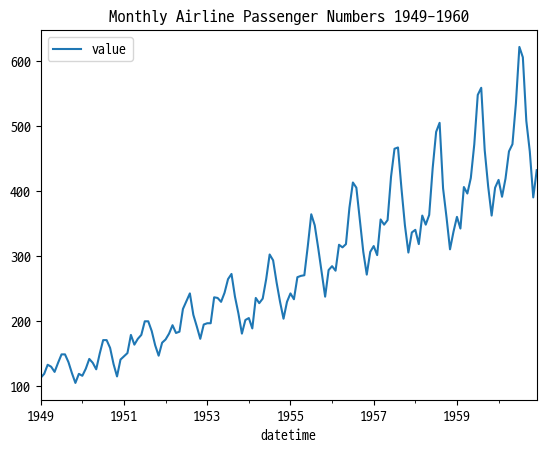

In [14]:
df.plot(x='datetime', y='value')
plt.title(data.title)
plt.show()

###### 2. scikit-learn

* scikit-learn 패키지는 머신러닝교육을 위한 패키지이다.
  1. 벤치마크용 데이터셋 예제
     - load계열  : 소량의 데이터(파일형태로 제공)
       - load_diabets, load_iris, load_digits...
     - fetch계열 : 대량의 데이터(인터넷을 다운후 사용)
       - fetch_olivetti_faces(올리베티얼굴사진)
       - fetch_lfw_people(유명인 얼굴이미지)
     - make계열  : 확률분포를 사용하여 생성되는 가상의 데이터
       - make_regression : 회귀분석용
       - make_classification : 분류용
       - make_blobs : 클러스터용
  1. 데이터전처리(preprocessing)
  1. 지도학습(Supervised Learning)
  1. 비지도학습(Unsupervised Learning)
  1. 모델의 평가 및 선택(Evaluation and Selection)
  
* 데이터셋의 형태
  - data(필수)  : 독립변수, ndarray 배열
  - target(필수): 종속변수, ndarray 배열
  - feature_names(옵션) : 독립변수명의 list
  - target_names(옵션)  : 종속변수명의 list
  - DESCR(옵션) : 데이터셋에 대한 설명

In [15]:
from sklearn.datasets import load_digits
import seaborn as sns

In [25]:
# load_digits는 손으로 쓴 숫자의 이미지데이터(8x8)
# "MNIST handwritten digit Image"
digits = load_digits()
print(type(digits))
print(digits.data[0], '의 이미지 숫자는 =', digits.target[0])
print(digits.data[1], '의 이미지 숫자는 =', digits.target[1])
print()

print(digits.images[0])

<class 'sklearn.utils._bunch.Bunch'>
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.] 의 이미지 숫자는 = 0
[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.] 의 이미지 숫자는 = 1

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


숫자이미지 인덱스를 입력하세요 => 100


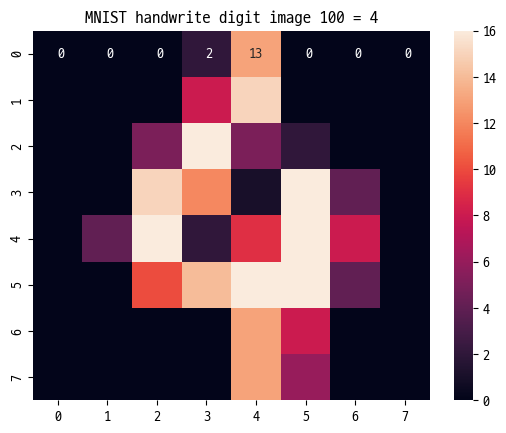

array([[ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 16.,  5.,  2.,  0.,  0.],
       [ 0.,  0., 15., 12.,  1., 16.,  4.,  0.],
       [ 0.,  4., 16.,  2.,  9., 16.,  8.,  0.],
       [ 0.,  0., 10., 14., 16., 16.,  4.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  6.,  0.,  0.]])

In [34]:
# 데이터의 시각화
num = int(input('숫자이미지 인덱스를 입력하세요 => '))
sns.heatmap(digits.images[num], annot=True, fmt="2.0f"
            , cbar=True, xticklabels=True, yticklabels=True) #, cmap='YiGnBu'
plt.title(f"MNIST handwrite digit image {num} = {digits.target[num]}")
plt.show()

digits.images[num]

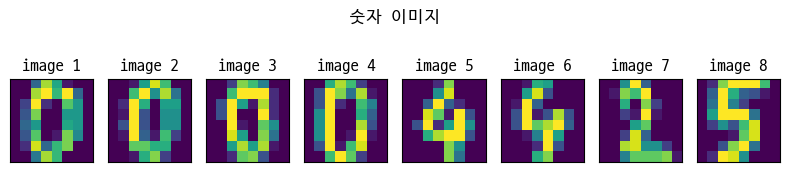

In [38]:
samples = [0, 10, 20, 30, 100, 111, 22, 32] # 샘플이미지 indes
d = []
for i in range(8):
    d.append(digits.images[samples[i]])

plt.figure(figsize=(8,2))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(d[i], interpolation='nearest') #, cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title(f'image {i+1}')
    
plt.suptitle('숫자 이미지')
plt.tight_layout()
plt.show()

In [43]:
print(digits.images[0], digits.images[0].shape) 
# 해당이미지를 8x8이차원배열이 아니라 64길이의 1차원배열형태로 예측모형에 전달
print(digits.images[0].flatten(), digits.images[0].flatten().shape) 

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]] (8, 8)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.] (64,)


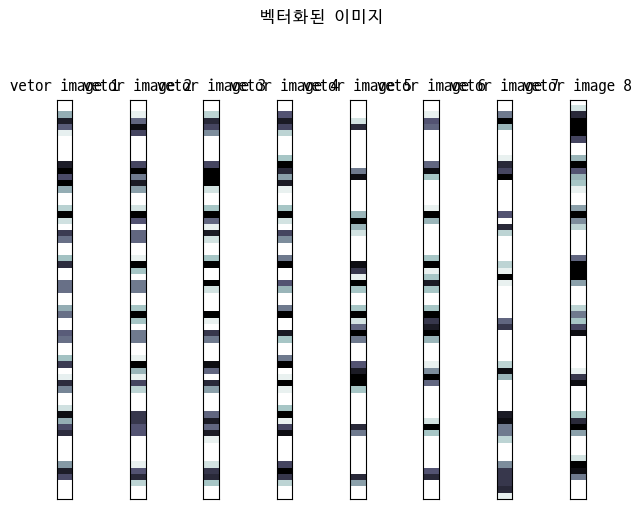

In [48]:
# vetor화된 이미지 시각화
v = []
for i in range(8):
    v.append(d[i].reshape(64,1))
    
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(v[i], interpolation='nearest', cmap=plt.cm.bone_r, aspect=0.4)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title(f'vetor image {i+1}')
    
plt.suptitle('벡터화된 이미지', y=1.05)
plt.tight_layout()
plt.show()